# **20BCE1205**

# **Shubham Ojha**

**Consider 2 datasets and Implement Agglomerative and Divisive Hierarchical Clustering using library functions. Compare the accuracy of the algorithm**

# **Agglomerative**

Points



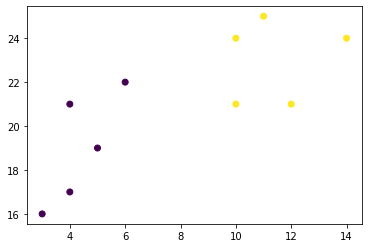


Dendrogram



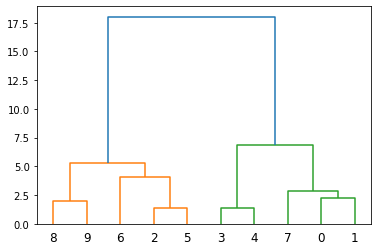


Dendrogram



Text(0, 0.5, 'Euclidean distance')

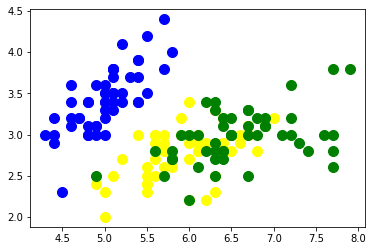

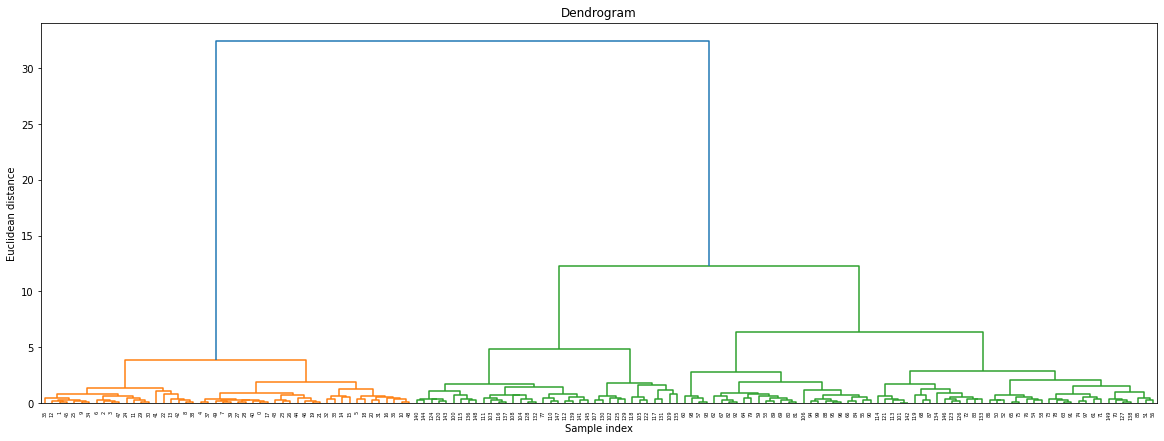

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets

# DATASET 1

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

print("Points\n")

plt.scatter(x, y, c=labels)
plt.show()

print("\nDendrogram\n")

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

# DATSET 2


iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
iris_data.head()
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
iris_Y = iris_data.iloc[:,4].values

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s=100, c='blue', label='Type 1')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s=100, c='yellow', label='Type 2')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], s=100, c='green', label='Type 3')

print("\nDendrogram\n")
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

dendrogram(linkage(iris_X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')



# **DIVISIVE**

In [ ]:
import numpy as np;
import pandas as pd

# DATASET 1

num_clusters = 0
mat = np.array([[0,2,6,10,9],[2,0,5,9,8],[6,5,0,4,5],[10,9,4,0,3],[9,8,5,3,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)


def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['c', 'd', 'e'], ['a', 'b']]
3 [['a', 'b'], ['d', 'e'], ['c']]
4 [['a', 'b'], ['c'], ['e'], ['d']]
5 [['c'], ['e'], ['d'], ['b'], ['a']]


In [ ]:
import numpy as np;
import pandas as pd
# DATASET 2
num_clusters = 0
mat = np.array([[0,1,2,3,4],[1,0,5,6,7],[2,5,0,8,9],[3,6,8,0,10],[4,7,9,10,0]])
all_elements = ['a','b','c','d','e']
dissimilarity_matrix = pd.DataFrame(mat,index=all_elements, columns=all_elements)


def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [['a', 'b', 'c', 'd', 'e']]
2 [['a', 'b', 'c', 'd'], ['e']]
3 [['e'], ['a', 'b', 'c'], ['d']]
4 [['e'], ['d'], ['a', 'b'], ['c']]
5 [['e'], ['d'], ['c'], ['b'], ['a']]
